# **중간고사 이전 내용 총 정리**

In [1]:
import torch
import torchvision

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## **Pre-Learning : 텐서**

---

### **A. 벡터**

`-` Vector 선언

In [ ]:
torch.tensor([1, 2, 3])

`-` Vector 덧셈

In [ ]:
torch.tensor([1, 2, 3]) + torch.tensor([2]*3)
torch.tensor([1, 2, 3]) + 2 ## 브로드캐스팅

### **B. 벡터와 매트릭스**

`-` 브로드 캐스팅

In [ ]:
## 브로드 캐스팅
torch.tensor([[1, 2],
              [3, 4],
              [5, 6]]) - 1

## 다른 연산
torch.tensor([[1, 2], [3, 4], [5, 6]])*0

In [ ]:
## 열별 브로드 캐스팅
torch.tensor([[1, 2], [3, 4], [5, 6]]) + torch.tensor([[-1],
                                                       [-3],
                                                       [-5]])

## 행별 브로드캐스팅
torch.tensor([[1, 2], [3, 4], [5, 6]]) + torch.tensor([[-1, -2]])

`-` 벡터와의 연산 : 열벡터로 취급

In [7]:
torch.tensor([[1, 2], [3, 4], [5, 6]]) + torch.tensor([1, 2])
torch.tensor([[1, 2], [3, 4], [5, 6]]) + torch.tensor([1, 2, 3]) ## 안됨

tensor([[2, 4],
        [4, 6],
        [6, 8]])

`-` 행렬곱

In [ ]:
## 정상적인 행렬곱
torch.tensor([[1, 2], [3, 4], [5, 6]]) @ torch.tensor([[1],
                                                       [2]])
torch.tensor([[1, 2], [3, 4], [5, 6]]) @ torch.tensor([1, 2]) ## 열벡터

`-` 벡터는 행렬곱 연산에서 열벡터도로, 행벡터로도 취급할 수 있음

In [ ]:
torch.tensor([[1, 2, 3]]) @ torch.tensor([[1, 2], [3, 4], [5, 6]])
torch.tensor([1, 2, 3]) @ torch.tensor([[1, 2], [3, 4], [5, 6]])

### **C. transpose, reshape**

`-` 전치

In [16]:
torch.tensor([[1, 2], [3, 4]]).T

tensor([[1, 3],
        [2, 4]])

`-` reshape

In [ ]:
torch.tensor([[1,2],[3,4],[5,6]]).reshape(2,-1) ## [[1, 2, 3], [4, 5, 6]]
torch.tensor([[1,2],[3,4],[5,6]]).reshape(-1,6)
torch.tensor([[1,2],[3,4],[5,6]]).reshape(-1)

### **D. concat, stack**

`-` concat(차원 유지, 쉬움)

In [18]:
a = torch.tensor([[1], [3], [5]])
b = torch.tensor([[2], [4], [5]])
torch.concat([a, b], axis = 1)

tensor([[1, 2],
        [3, 4],
        [5, 5]])

`-` stack(차원 늘림, 어려움)

In [19]:
a = torch.tensor([1, 3, 5])
b = torch.tensor([2, 4, 6])
torch.stack([a, b], axis = 1)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [21]:
torch.concat([a.reshape(3, 1), b.reshape(3, 1)], axis = 1)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

## **1. 회귀**

---

### **A. 내용**

`-` 단순선형회귀모형

$$\begin{align} y_i & = w_0 + w_1 x_i + \epsilon, ~ i = 1, 2, \cdots \\
{\bf y} & = {\bf WX + \epsilon}
\end{align}$$

* 단순선형회귀에서 최적화하고자 하는 파라미터

$$ loss(\hat{w}_0,\hat{w}_1) := loss(\hat{\bf W})=\sum_{i=1}^{n}(y_i-(\hat{w}_0+\hat{w}_1x_i))^2=({\bf y}-{\bf X}{\bf \hat{W}})^\top({\bf y}-{\bf X}{\bf \hat{W}})$$

$$\hat{\bf W}^{LSE} = \underset{\bf \hat{W}}{\operatorname{argmin}} ~ loss(\hat{\bf W})$$

> 위의 식은
> $\hat{\bf W} = \underset{\bf W}{\operatorname{argmin}} ~ loss({\bf W})$
> 로 생각해도 무방

### **B. 구현**

`-` 쌩으로 구현(미분만 사용)

In [9]:
## data
What = torch.tensor([[1.0], [2.0]], requires_grad = True) ## 매개변수 넣어야 미분 가능
X = torch.stack([torch.ones(len(x)), x], axis = 1)

##---##
for epoc in range(100) :
    yhat = X@What
    
    loss = torch.mean((yhat-y)**2)
    loss.backward()

    What.data -= 0.1*What.grad ## learning rate == 0.1
    What.grad = None

`-` 네트워크, 손실함수, 옵티마이저 사용

In [ ]:
# net = torch.nn.Linear(in_features = 1, out_features = 1, bias = True) ## 이쪽이 일반적
net = torch.nn.Linear(in_features = 2, out_features = 1, bias = False)
net.weight.data = torch.tensor([[1.0, 2.0]]) ## 행벡터로 삽입
# net.bias.data = torch.tensor([1.0])

loss_fn = torch.nn.MSELoss() ## calla회귀 문제에서 일반적으로 사용
optimizr = torch.optim.SGD(net.parameters(), lr = 0.1) ## iterabla obj : 데이터와 그래디언트

##---##
for epoc in range(300) :
    yhat = net(X)
    
    loss = loss_fn(yhat, y)
    loss.backward()

    optimizr.step()
    optimizr.zero_grad()

> `bias`를 넣든, 안넣고 따로 설명변수 매트릭스를 넣든, 둘 다 하든지간에 `yhat`과 추정 결과는 동일함(다만 효율이랑 가시성이 좀 구리겠지...)

## **2. 로지스틱**

---

### **A. 내용**

> 이진 분류 문제를 해결하기 위한 가장 기초적인 모형
>
> 순방향 구조, 선형 구조만 제대로 설명할 수 있다는 점에서 모형의 표현력이 다소 낮음

-   회귀모형: $y_i \sim {\cal N}(w_0+w_1x_i, \sigma^2)$ -> 정규분포의 평균 예측

-   로지스틱: $y_i \sim {\cal B}(\pi_i),\quad$ where $\pi_i = \frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)} = \frac{1}{1+\exp(-w_0-w_1x_i)}$
> 베르누이의 평균(확률값)을 예측

### **B. 구현**

`-` 쌩으로 구현(미분만 이용)

In [15]:
What = torch.tensor([[1.0],
                     [1.0]], requires_grad = True) ## 절편 추가

def sigmoid(x) :
    return 1/(1+torch.exp(-(What.data[0] + What.data[1]*x)))

for epoc in range(300) :
    yhat = sidmoid(X)

    ## MLE니까 가능도가 가장 높은 -> -l이 가장 작은 것을 찾는 최적화 문제로 바꿈
    loss = -torch.sum(y*torch.log(yhat) + (1-y)*torch.log(1-yhat)) ## 강의 노트엔 그냥 MSELoss 쓰긴 함...
    loss.backward()
    
    What.data -= 0.1*What.grad
    What.grad = None

`-` 네트워크, BCELoss, Adam 사용

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(2, 1), ## 이진 분류문제이므로 y의 차원은 1
    torch.nn.Sigmoid()
)
net[0].weight.data = torch.tensor([[1.0, 1.0]])
net[0].bias.data = torch.tensor([1.0])

loss_fn = torch.nn.BCELoss()

## 지역 최소값에 잘 빠지지 않고, 최적화 속도가 빠름
optimizr = torch.optim.Adam(net.parameters(), lr = 0.1)

##---##
for epoc in range(300) :
    yhat = net(X)
    
    loss = loss_fn(yhat, y)
    loss.backward()
    
    optimizr.step()
    optimizr.zero_grad()

## **3. 신경망, ReLU, 사용자 정의 네트워크**

---

* 시그모이드에 넣기 전, 꺾인 그래프를 만들어 로지스틱의 표현력을 확보
* 신경망의 경우 회귀분석과 달리 여러 개의 최적값이 존재할 수 있음 -> 한 개의 global minimum만 가지지 않을 수 있음

`-` `ReLU`

In [ ]:
x = torch.arange(-10, 10).float()
relu = torch.nn.ReLU()

## v자 그래프
relu(x) + relu(-x)

## A자 그래프
- relu(x) - relu(-x)

In [ ]:
## 브로드캐스팅
u = torch.stack([x, -x], axis = 1)
v = relu(u)

-4.5*v[:, [0]] - 9.0*v[:, [1]] + 4.5 ## 이 경우 [0]번 열이 뒤쪽, [1]번 열이 앞쪽 모양을 담당

## 선형 결합
l2 = torch.nn.Linear(2, 1, bias = True)
l2.weight.data = torch.tensor([[-4.5, -9.0]])
l2.bias.data = torch.tensor([4.5])

l2(v)

## 두 번의 선형 결합
l1 = torch.nn.Linear(1, 2)
l1.weight.data = torch.tensor([[1.0], [-1.0]]) ## 실제로 행벡터를 넣어야 하니 반대로...
l1.bias.data = l1.bias.data*0

l2(relu(l1(x.reshape(-1, 1))))

`-` `H`

In [ ]:
class H(torch.nn.Module) :
    def __init__(self) :
        super.__init__() ## 슈퍼 클래스의 __init__을 그대로 상속

    def forward(self, u) :
        ## 메소드 오버라이딩
        h = lambda x : torch.sigmoid(200*(x+0.5)) + torch.sigmoid(-200*(x-0.5)) - 1.0
        v = h(u)
        return v

`-` 기초적인 신경망

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(1, 2),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1),
    torch.nn.Sigmoid()
)

loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.Adam(net.parameters())

##---##
for epoc in range(300) :
    yhat = net(X)

    loss = loss_fn(yhat, y)
    loss.backward()

    optimizr.step()
    optimizr.zero_grad()

## **4. 시벤코 정리**

---

> 하나의 은닉층을 가지는 네트워크는 모든 보렐 가측함수 $f: {\bf X}_{n \times p} \to {\bf y}_{n\times q}$를 원하는 정확도로 근사시킬 수 있음
>
> 이 때, 은닉층의 활성화함수는 어떤 것이여도 상관없음 (`ReLU`, `Sidmoid`, `H`, ...)
>
> 즉, 하나의 은닉층을 가진 신경망의 표현력은 거의 무한대라 볼 수 있음

* 분류 모형의 경우

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(1, 1024),
    H(), ## ReLU, Sigmoid...
    torch.nn.Linear(1024, 1),
    torch.nn.Sigmoid() ## 시그모이드를 넣어줌
)

loss_fn = torch.nn.BCELoss()

* 회귀 모형의 경우

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(1, 1024),
    H(), ## ReLU, Sigmoid...
    torch.nn.Linear(1024, 1)
)

loss_fn = torch.nn.MSELoss()

> 그냥 요즘은 데이터 structure를 따라가는 구조를 만드는 데에 너무 집중하지 않아도 되니까, 모양을 직접 구현하는 것까지는 안해도 될듯

`-` 그래도 혹시 모르니까 시그모이드로 계단 만드는 코드 실습...

In [83]:
x = torch.arange(-1.5, 1.5, 0.05).reshape(-1, 1).float()

l1 = torch.nn.Linear(1, 3)
a1 = torch.nn.Sigmoid()
l2 = torch.nn.Linear(3, 1)

In [85]:
l1.weight.data = torch.tensor([[-50.0], [50.0], [-50.0]])
l1.bias.data = torch.tensor([-50.0, 0.0, 50.0]) ## weight*(x - bias)

In [86]:
l2.weight.data = torch.tensor([[1.0, 2.0, 1.0]])
l2.bias.data = torch.tensor([-1.0])

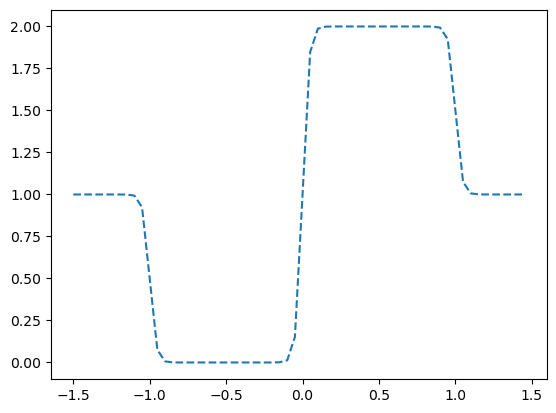

In [88]:
plt.plot(x, l2(a1(l1(x))).data, '--');

## **5. 평가, 오버피팅, Dropout**

> 하나 이상의 은닉층을 가지는 네트워크의 표현력은 거의 무한대임. 그렇기 때문에 맞추지 말아야 할 오차항까지 맞출 수 있음.
>
> 네트워크가 학습하지 못한 자료에서도 신경망이 올바르게 작동한다는 보장은 없음.

### **A. 스코어링**

* 모형 훈련 시에는 `net.train()`을 사용하여 훈련 모드로 전환한다.
* 스코어 산출 시에는 `net.eval()`을 사용하여 평가 모드로 전환한다.

`-` **MSE**

In [ ]:
net.eval()

train_mse = torch.mean((y - net(X).data)**2) ## loss_fn(net(X), y)
test_mse = torch.mean((yy - net(XX).data)**2) ## loss_fn(net(XX), yy)

`-` **Accuracy**

In [ ]:
net.eval()

## 확률을 비교하는 경우
train_acc = ((net(X) > 0.5) == y).float().mean() ## loss_fn(net(X), y)
test_acc = ((net(XX) > 0.5) == yy).float().mean() ## loss_fn(net(XX), yy)

In [ ]:
net.eval()

## 로짓을 비교하는 경우
train_acc = ((net(X) > 0.0) == y).float().mean() ## loss_fn(net(X), y)
test_acc = ((net(XX) > 0.0) == yy).float().mean() ## loss_fn(net(XX), yy)

### **B. `Dropout`**

* 각 파라미터를 p 확률로 0을 만든다. 0이 아닌 파라미터들은 빠진만큼 대략 1/p의 가중치를 곱해준다.
* 활성화함수 뒤에 사용하지만, `ReLU`의 경우 그 앞에 사용해도 동일한 효과를 제공한다. 해당 방법이 컴퓨팅 관점에서 더 효율적이다.

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(m, x),
    torch.nn.Dropout(0.5), ## 대략 절반의 파라미터를 0으로 날림.
    torch.nn.ReLU(),
    torch.nn.Linear(x, n)
)

loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())

for epoc in range(k) :
    net.train() ## training mode activate
    yhat = net(x)
    loss = loss_fn(yhat, y)
    optimizr.step()
    optimizr.zero_grad()

    if epoc % 50 == 0 :
        net.eval() ## evaluation mode activate -> dropout 적용
        yyhat = net(xx)
        test_score = loss_fn(yyhat, yy)
        print(f"test MSE = {test_score:.4f}")

## **6. 이미지 파일**

`-` `matplotlib`에서의 이미지 텐서 포매팅 : `(h, w, c)`

In [ ]:
plt.imshow(img, cmap = "gray") ## img 텐서의 자료형이 float이면 0~1로 먹임

`-` 파이토치에서의 이미지 텐서 포매팅 : `(n, c, h, w)`

## **7. GPU, 배치 사용법**